# Compare Random Forest feature importance with Morpheus Marker Selection

In [1]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import pandas as pd
import easygui as eg
import numpy as np
import sys
import os

sys.path.append(r"C:\Users\fefos\Documents\GitHub") #add here the path in your computer to scripts_notebooks_fossa

from scripts_notebooks_fossa.machine_learning import random_forest_utils

%load_ext autoreload
%autoreload 2

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


- Define some variables that will be used later in the notebook

In [2]:
path=r'C:\Users\fefos\Documents\GitHub\2022_09_09_LiveCellPainting_fossa_Cimini\analysis\2021_10_08_AgNPViability\feature_importance'

In [3]:
plt.rcParams['font.sans-serif'] = ['Open Sans', 'Arial', 'sans-serif']
plt.rcParams['font.serif'] = ['Open Sans', 'Arial', 'sans-serif']
plt.rcParams['font.monospace'] = ['Open Sans', 'Arial', 'sans-serif']

# Ag100

['Cytoplasm_AreaShape_Solidity', 'Cytoplasm_Intensity_IntegratedIntensity_CorrPI', 'Cytoplasm_Texture_Contrast_CorrPI_5_02_256', 'Cytoplasm_Texture_Entropy_CorrPI_20_03_256', 'Cytoplasm_Texture_Entropy_CorrPI_5_02_256', 'Nuclei_AreaShape_SpatialMoment_1_3', 'Nuclei_Granularity_6_CorrGFP', 'Nuclei_Intensity_MassDisplacement_CorrGFP']


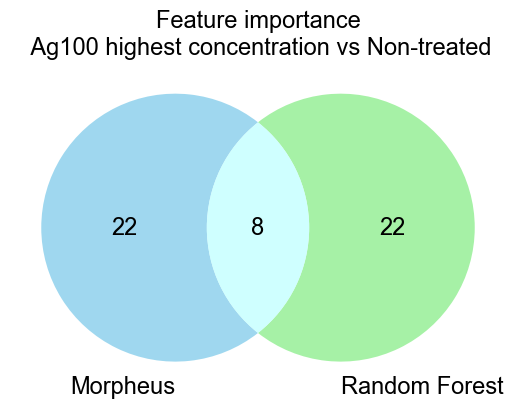

In [4]:
experiment = "Ag100_highestconc_nontreated"

# Open feature importance df's
morpheus=pd.read_csv(fr"{path}\morpheus\{experiment}.csv")
rf=pd.read_csv(fr"{path}\random_forest\{experiment}.csv")
# Convert to list
list_morpheus = morpheus['feature'].to_list()
list_rf = rf['features'].to_list()
# Find matching values
matching_values = [value for value in list_rf if value in list_morpheus]
print(sorted(matching_values))

# Plot venn
set1 = set(list_morpheus)
set2 = set(list_rf)
# Find matching and non-matching values
matching_values = set1.intersection(set2)
non_matching_values_list1 = set1 - matching_values
non_matching_values_list2 = set2 - matching_values
# Create a Venn diagram
venn_labels = {'100': f'List 1\n{non_matching_values_list1}',
               '010': f'List 2\n{non_matching_values_list2}',
               '110': f'Matching\n{matching_values}'}

v = venn2(subsets=[len(non_matching_values_list1), len(non_matching_values_list2), len(matching_values)],
      set_labels=('Morpheus', 'Random Forest'),
      set_colors=('skyblue', 'lightgreen'),
      alpha=0.8,
      normalize_to=1.0,
    #   subset_label_formatter=lambda x: venn_labels[x]
      )

for t in v.set_labels: 
  t.set_fontsize(17)
for t in v.subset_labels: 
  t.set_fontsize(17)

# Display the plot
plt.title("Feature importance\n Ag100 highest concentration vs Non-treated", fontsize=17)
plt.savefig("Ag100.svg")
plt.show()


# Ag40

['Cells_RadialDistribution_RadialCV_CorrPI_1of4', 'Cells_Texture_AngularSecondMoment_CorrGFP_20_01_256', 'Cells_Texture_InfoMeas2_CorrGFP_10_00_256', 'Cells_Texture_InverseDifferenceMoment_CorrGFP_20_02_256', 'Cytoplasm_Intensity_IntegratedIntensity_CorrPI', 'Cytoplasm_Texture_AngularSecondMoment_CorrPI_20_03_256', 'Cytoplasm_Texture_Entropy_CorrPI_20_03_256', 'Cytoplasm_Texture_Entropy_CorrPI_5_02_256', 'Cytoplasm_Texture_InverseDifferenceMoment_CorrPI_5_02_256', 'Nuclei_Intensity_MassDisplacement_CorrGFP', 'Nuclei_Mean_Nucleoli_Intensity_MADIntensity_CorrGFP', 'Nuclei_Texture_Correlation_CorrPI_5_01_256']


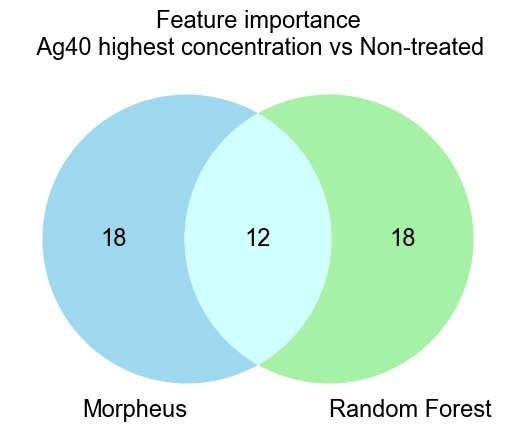

In [5]:
experiment = "Ag40_highestconc_nontreated"

# Open feature importance df's
morpheus=pd.read_csv(fr"{path}\morpheus\{experiment}.csv")
rf=pd.read_csv(fr"{path}\random_forest\{experiment}.csv")
# Convert to list
list_morpheus = morpheus['feature'].to_list()
list_rf = rf['features'].to_list()
# Find matching values
matching_values = [value for value in list_rf if value in list_morpheus]
print(sorted(matching_values))

# Plot venn
set1 = set(list_morpheus)
set2 = set(list_rf)
# Find matching and non-matching values
matching_values = set1.intersection(set2)
non_matching_values_list1 = set1 - matching_values
non_matching_values_list2 = set2 - matching_values
# Create a Venn diagram
venn_labels = {'100': f'List 1\n{non_matching_values_list1}',
               '010': f'List 2\n{non_matching_values_list2}',
               '110': f'Matching\n{matching_values}'}

v = venn2(subsets=[len(non_matching_values_list1), len(non_matching_values_list2), len(matching_values)],
      set_labels=('Morpheus', 'Random Forest'),
      set_colors=('skyblue', 'lightgreen'),
      alpha=0.8,
      normalize_to=1.0,
    #   subset_label_formatter=lambda x: venn_labels[x]
      )
for t in v.set_labels: 
  t.set_fontsize(17)
for t in v.subset_labels: 
  t.set_fontsize(17)

# Display the plot
plt.title("Feature importance\n Ag40 highest concentration vs Non-treated", fontsize=17)
plt.savefig("Ag40.svg")
plt.show()